# Proyek Analisis Data : Bike Sharing Dataset


- Nama : Gede Pradnyananda
- Email : gedenanda4444@gmail.com
- ID Dicoding : gede_pradnyananda

# Menentukan Pertanyaan Bisnis

	1. Antara weekday atau holiday, mana peminjaman tertinggi antara 4 musim?
	2. Kapan jam dengan peminjaman tertinggi
	3. Kapan musim dengan peminjaman sepeda tertinggi?
	4. Perbandingan antara peretnal Casual dan registered dalam setahun, perbulan dan permusim

# Menyiapkan Semua Library yang dibutuhkan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

## Gathering Data

Langkah pertama dalam wrangling data adalah mengumpulkan data. Dalam tugas ini, data yang saya gunakan adalah data Rental sepeda yang memiliki 2 dataset yaitu data yang di hitung perhari dan dihitung perjam

In [2]:
data_day = pd.read_csv('Dataset/day.csv')
data_hour =  pd.read_csv('Dataset/hour.csv')

In [3]:
data_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  2011-01-01       1   0     1        0        6           0   
1          2  2011-01-02       1   0     1        0        0           0   
2          3  2011-01-03       1   0     1        0        1           1   
3          4  2011-01-04       1   0     1        0        2           1   
4          5  2011-01-05       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
0             2  0.344167  0.363625  0.805833   0.160446     331         654   
1             2  0.363478  0.353739  0.696087   0.248539     131         670   
2             1  0.196364  0.189405  0.437273   0.248309     120        1229   
3             1  0.200000  0.212122  0.590435   0.160296     108        1454   
4             1  0.226957  0.229270  0.436957   0.186900      82        1518   
..          ...       ...       ...       ...        ...     ...         ...   
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729  

[731 rows x 16 columns]

In [4]:
data_hour

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

insight : Terdapat 2 data berdasarkan pencatatan, yaitu data secara pertahun dan perjam. Kedua data ini dicatat selam 2 tahun yaitu tahun 2011 dan 2012. Terdapat beberapa fitur, mulai dari data tanggal, musim, hari, kedaan cuaca, jumlah perenta dan sebagainya.

## Acessing Data

<h4>Menilai kedua tabel</h4>

Dalam menilai kedua data, saya perlu tau keadaan data tersebut dengan menggunakan info(). Dengan ini saya langsung bisa mengetahui ada tidaknya data yang null serta duplicated() untuk mengetahui apakah ada data yang duplikasi.

In [5]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
data_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
data_hour.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [9]:
#Cek Duplikasi
print(data_hour.duplicated().sum())
print(data_day.duplicated().sum())

0
0


Insight : Kedua data, bersih dari duplikasi dan nilai null. 

## Data Cleaning

Data sudah bersih dari nilai null dan duplicate, sehingga tidak perlu pembersihan data lagi

## Exploratory Data Analysis (EDA)

Langkah selanjutnya, saya akan mengeksplorasi data data yang telah saya siapkan agar mendapatkan insight yang bernilai

In [10]:
data_day.sample(10)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
446      447  2012-03-22       2   1     3        0        4           1   
602      603  2012-08-25       3   1     8        0        6           0   
633      634  2012-09-25       4   1     9        0        2           1   
202      203  2011-07-22       3   0     7        0        5           1   
504      505  2012-05-19       2   1     5        0        6           0   
495      496  2012-05-10       2   1     5        0        4           1   
683      684  2012-11-14       4   1    11        0        3           1   
688      689  2012-11-19       4   1    11        0        1           1   
305      306  2011-11-02       4   0    11        0        3           1   
516      517  2012-05-31       2   1     5        0        4           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
446           1  0.554167  0.531567  0.831250   0.117562    1334        5537   
602           2  0.661667  0.618696  0.712917   0.244408    1829        4224   
633           1  0.550000  0.544179  0.570000   0.236321     845        6693   
202           1  0.848333  0.840896  0.580417   0.133100     562        2825   
504           1  0.600000  0.566908  0.456250   0.083975    3410        4884   
495           1  0.505833  0.491783  0.552083   0.314063    1026        5546   
683           1  0.289167  0.281563  0.552083   0.199625     373        5122   
688           2  0.380833  0.375621  0.623333   0.235067     449        5050   
305           1  0.377500  0.390133  0.718750   0.082092     370        3816   
516           1  0.680000  0.631329  0.492917   0.195279    1100        6238   

      cnt  
446  6871  
602  6053  
633  7538  
202  3387  
504  8294  
495  6572  
683  5495  
688  5499  
305  4186  
516  7338

In [11]:
data_day.describe(include='all')

instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  731.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.028728    2.997264    0.683995    1.395349    0.495385   
std       0.167155    2.004787    0.465233    0.544894    0.183051   
min       0.000000    0.000000    0.000000    1.000000    0.059130   
25%       0.000000    1.000000    0.000000    1.000000    0.337083   
50%       0.000000    3.000000    1.000000    1.000000    0.498333   
75%       0.000000    5.000000    1.000000    2.000000    0.655417   
max       1.000000    6.000000    1.000000    3.000000    0.861667   

             atemp         hum   windspeed       casual   registered  \
count   731.000000  731.000000  731.000000   731.000000   731.000000   
unique         NaN         NaN         NaN          NaN          NaN   
top            NaN         NaN         NaN          NaN          NaN   
freq           NaN         NaN         NaN          NaN          NaN   
mean      0.474354    0.627894    0.190486   848.176471  3656.172367   
std       0.162961    0.142429    0.077498   686.622488  1560.256377   
min       0.079070    0.000000    0.022392     2.000000    20.000000   
25%       0.337842    0.520000    0.134950   315.500000  2497.000000   
50%       0.486733    0.626667    0.180975   713.000000  3662.000000   
75%       0.608602    0.730209    0.233214  1096.000000  4776.500000   
max       0.840896    0.972500    0.507463  3410.000000  6946.000000   

                cnt  
count    731.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean    4504.348837  
std     1937.211452  
min       22.000000  
25%     3152.000000  
50%     4548.000000  
75%     5956.000000  
max     8714.000000

In [12]:
data_hour.sample(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
3363      3364  2011-05-25       2   0     5   1        0        3   
16268    16269  2012-11-15       4   1    11  14        0        4   
13894    13895  2012-08-07       3   1     8   3        0        2   
2524      2525  2011-04-20       2   0     4   2        0        3   
8068      8069  2011-12-07       4   0    12  20        0        3   
6993      6994  2011-10-24       4   0    10   0        0        1   
5422      5423  2011-08-18       3   0     8  20        0        4   
2580      2581  2011-04-22       2   0     4  10        0        5   
5386      5387  2011-08-17       3   0     8   8        0        3   
129        130  2011-01-06       1   0     1  15        0        4   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
3363            1           3  0.58  0.5455  0.83     0.1940       6   
16268           1           2  0.38  0.3939  0.54     0.1642      27   
13894           1           1  0.70  0.6667  0.84     0.0000       0   
2524            1           1  0.42  0.4242  0.94     0.1642       0   
8068            1           3  0.34  0.2879  0.87     0.6418       1   
6993            1           1  0.42  0.4242  0.77     0.0000       6   
5422            1           1  0.66  0.6061  0.83     0.1045      24   
2580            1           2  0.36  0.3485  0.62     0.1940      32   
5386            1           1  0.70  0.6515  0.54     0.1642      35   
129             1           1  0.28  0.2727  0.36     0.0000       8   

       registered  cnt  
3363            2    8  
16268         174  201  
13894           6    6  
2524            2    2  
8068           25   26  
6993           26   32  
5422          141  165  
2580          104  136  
5386          452  487  
129            54   62

In [13]:
data_hour.describe(include='all')

instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered           cnt  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

In [46]:
data_day.groupby(by='season').agg({
    'cnt': 'sum',
    'casual' : 'sum',
    'registered' : 'sum'
})

cnt  casual  registered
season                             
1        471348   60622      410726
2        918589  203522      715067
3       1061129  226091      835038
4        841613  129782      711831

In [47]:
data_day.groupby(by='mnth').agg({
    'cnt': 'sum',
    'casual' : 'sum',
    'registered' : 'sum'
})

cnt  casual  registered
mnth                            
1     134933   12042      122891
2     151352   14963      136389
3     228920   44444      184476
4     269094   60802      208292
5     331686   75285      256401
6     346342   73906      272436
7     344948   78157      266791
8     351194   72039      279155
9     345991   70323      275668
10    322352   59760      262592
11    254831   36603      218228
12    211036   21693      189343

insight : data day : dalam 1 hari, paling sediikit perental sebanyak 22 orang dengan tipe casual 2 orang dan registered 22 orang dan paling banyak 
dalam sehari adalah sebanyak 8714 dengan tipe casual 3410 orang dan tipe registered 6946 orang

## Visualitation & Explanatory Analysis

### Antara weekday atau holiday, Kapan peminjaman tertinggi antara 4 musim?

In [ ]:
season1 = data_day[data_day['season']==1]
season1['workingday'] = season1['workingday'].map({0:'Weekend Spring ', 1:'Workingday Spring'})
season2 = data_day[data_day['season']==2]
season2['workingday'] = season2['workingday'].map({0:'Weekend Summer', 1:'Workingday Summer'})
season3 = data_day[data_day['season']==3]
season3['workingday'] = season3['workingday'].map({0:'Weekend Fall', 1:'Workingday Fall'})
season4 = data_day[data_day['season']==4]
season4['workingday'] = season4['workingday'].map({0:'Weekend Winter', 1:'Workingday Winter'})

/tmp/ipykernel_6602/2558636841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season1['workingday'] = season1['workingday'].map({0:'Weekend Spring ', 1:'Workingday Spring'})
/tmp/ipykernel_6602/2558636841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season2['workingday'] = season2['workingday'].map({0:'Weekend Summer', 1:'Workingday Summer'})
/tmp/ipykernel_6602/2558636841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
season1_sum = season1.groupby('workingday')['cnt'].sum().reset_index()
season2_sum = season2.groupby('workingday')['cnt'].sum().reset_index()
season3_sum = season3.groupby('workingday')['cnt'].sum().reset_index()
season4_sum = season4.groupby('workingday')['cnt'].sum().reset_index()

In [17]:
season_total = pd.concat([season1_sum,season2_sum,season3_sum,season4_sum], ignore_index=True)
season_total

workingday     cnt
0    Weekend Spring   137683
1  Workingday Spring  333665
2     Weekend Summer  287976
3  Workingday Summer  630613
4       Weekend Fall  312056
5    Workingday Fall  749073
6     Weekend Winter  262554
7  Workingday Winter  579059

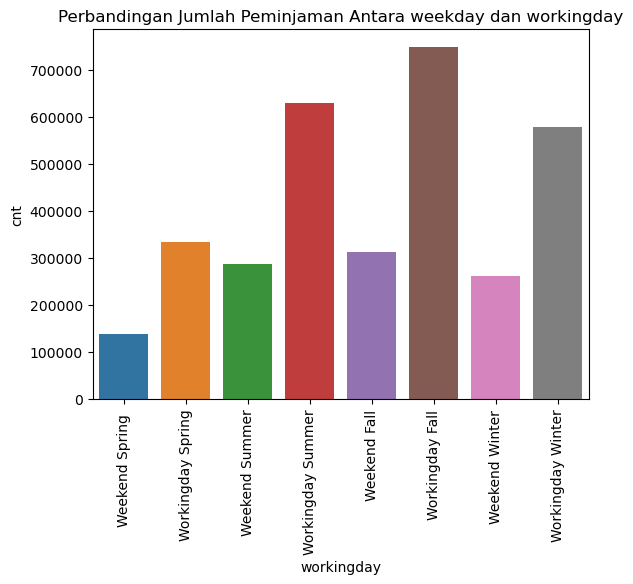

In [18]:
sns.barplot(data=season_total, x='workingday', y='cnt')
plt.title('Perbandingan Jumlah Peminjaman Antara weekday dan workingday')
plt.xticks(rotation=90)
plt.show()

insight : Dari Visualisasi di atas, jumlah perental paling banyak ada pada working day, pada musim gugur, panas dan dingin. 

### Kapan Jam dengan rata rata peminjaman terbanyak?

In [19]:
hour_rental = data_hour.groupby('hr')['cnt'].mean().reset_index()
hour_rental

hr         cnt
0    0   53.898072
1    1   33.375691
2    2   22.869930
3    3   11.727403
4    4    6.352941
5    5   19.889819
6    6   76.044138
7    7  212.064649
8    8  359.011004
9    9  219.309491
10  10  173.668501
11  11  208.143054
12  12  253.315934
13  13  253.661180
14  14  240.949246
15  15  251.233196
16  16  311.983562
17  17  461.452055
18  18  425.510989
19  19  311.523352
20  20  226.030220
21  21  172.314560
22  22  131.335165
23  23   87.831044

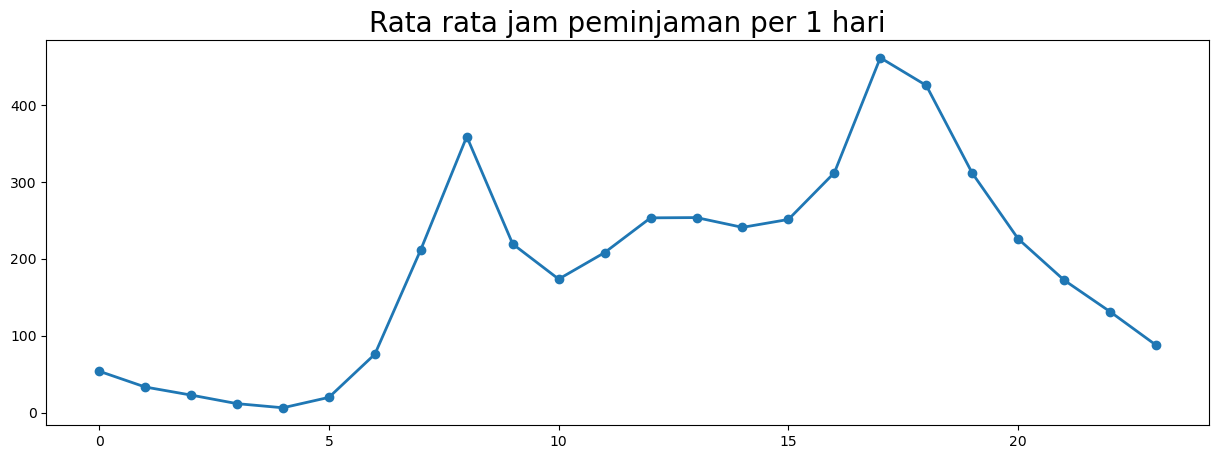

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(
    hour_rental["hr"],
    hour_rental["cnt"],
    marker='o', 
    linewidth=2
)
plt.title("Rata rata jam peminjaman per 1 hari", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Insight : Dari Hasil visualisasi, diketahui bahwa rata rata peminjaman sepeda perhari terdapat pada jam 17 atau jam 5 sore. dari visualisasi di atas, ada insight bahwa 2 titik puncak menggambarkan 2 waktu tertinggi, yaitu saat pagi jam 8 dan sore jam 5. Artinya dalam satu hari ada 2 waktu dengan rentang waktu yang tidak dekat, yang memiliki rata rata perental yang tinggi. 

### Kapan Musim dengan Peminjaman sepeda tertinggi

In [27]:
season_rental = data_day.groupby('season').agg(
    cnt_sum=('cnt', 'sum'),  
    cnt_mean=('cnt', 'mean') 
).reset_index()
season_rental = season_rental.rename(columns={'cnt_sum': 'Rental Total', 'cnt_mean': 'Rental Avg'})
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rental['season'] = season_rental['season'].replace(season_mapping)
season_rental

season  Rental Total   Rental Avg
0  Spring        471348  2604.132597
1  Summer        918589  4992.331522
2    Fall       1061129  5644.303191
3  Winter        841613  4728.162921

Untuk mengetahui Kapan musim dengan peminjaman sepeda tertinggi, digunakan groupby dengan kolom season dan cnt agar menghasilkan data jumlah total peminjaman sepeda permusim.

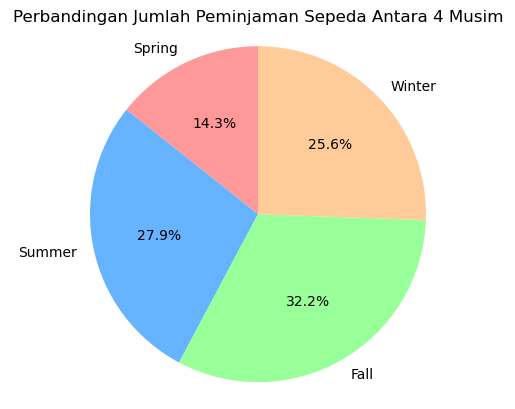

In [30]:

labels = season_rental['season']  
sizes = season_rental['Rental Total']  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('Perbandingan Jumlah Peminjaman Sepeda Antara 4 Musim')
plt.axis('equal')  
plt.show()


Sedangkan untuk mengetahui Rata Rata dan jumlah pengguna rental perbuland dapat dilihat di bawah ini


In [43]:
month_rental = data_day.groupby('mnth').agg(
    cnt_sum=('cnt', 'sum'),  
    cnt_mean=('cnt', 'mean')  
).reset_index()

month_rental = month_rental.rename(columns={'cnt_sum': 'Rental Total', 'cnt_mean': 'Rental Avg'})

month_mapping = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

month_rental['mnth'] = month_rental['mnth'].replace(month_mapping)
month_rental

mnth  Rental Total   Rental Avg
0     Januari        134933  2176.338710
1    Februari        151352  2655.298246
2       Maret        228920  3692.258065
3       April        269094  4484.900000
4         Mei        331686  5349.774194
5        Juni        346342  5772.366667
6        Juli        344948  5563.677419
7     Agustus        351194  5664.419355
8   September        345991  5766.516667
9     Oktober        322352  5199.225806
10   November        254831  4247.183333
11   Desember        211036  3403.806452

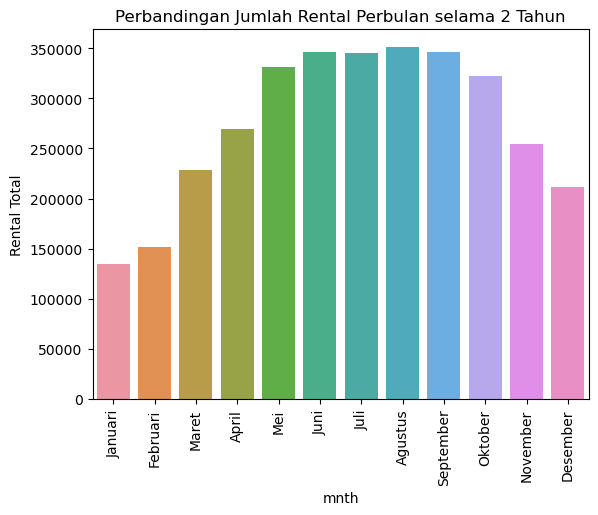

In [84]:
sns.barplot(data=month_rental, x='mnth', y='Rental Total')
plt.title('Perbandingan Jumlah Rental Perbulan selama 2 Tahun')
plt.xticks(rotation=90)
plt.show()

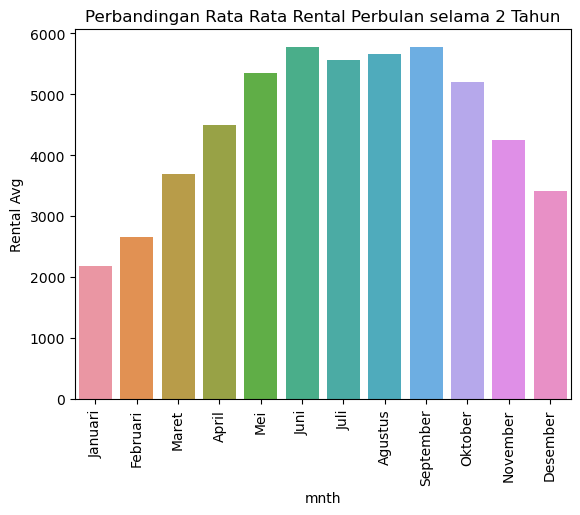

In [83]:
sns.barplot(data=month_rental, x='mnth', y='Rental Avg')
plt.title('Perbandingan Rata Rata Rental Perbulan selama 2 Tahun')
plt.xticks(rotation=90)
plt.show()

Insight : Dari visualisasi di atas Diantara musim semi, musim panas, musim gugur dan musim dingin, musim gugur memiliki catatan jumlah rental tertinggi dibandingkan musim yang lainnya. Sedangkan untuk perbulan pengguna mulai banyak pada saatu sekitar pertengahan tahun, mulai dari juni gingga september.

### Bagaimana perbandingan antara perental Casual dan Registered dalam setahun, perbulan dan per musim?

Untuk yang pertama saya akan menampilkan perbandingan jenis perental tahun 2011 dan 2012

In [56]:
year_rental = data_day.groupby('yr').agg(
    cas_sum=('casual', 'sum'),  
    reg_sum=('registered', 'sum')  
).reset_index()

year_rental = year_rental.rename(columns={'cas_sum': 'Total Casual', 'reg_sum': 'Total Registered'})
year_mapping = {0: '2011', 1:'2012'}
year_rental['yr'] = year_rental['yr'].replace(year_mapping)
year_rental['Total'] = year_rental['Total Casual'] + year_rental['Total Registered']
year_rental

yr  Total Casual  Total Registered    Total
0  2011        247252            995851  1243103
1  2012        372765           1676811  2049576

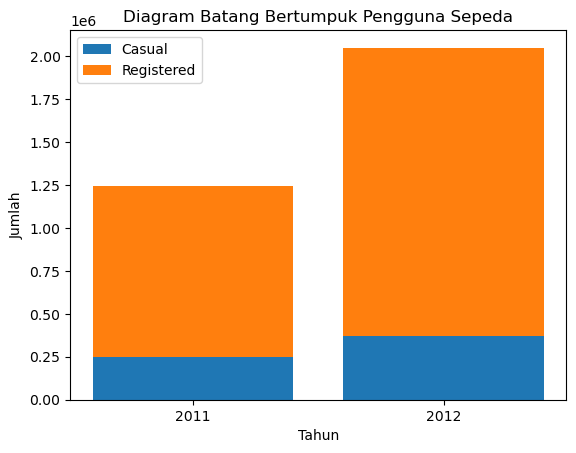

In [60]:
plt.bar(year_rental['yr'], year_rental['Total Casual'], label='Casual')
plt.bar(year_rental['yr'], year_rental['Total Registered'], 
        bottom=year_rental['Total Casual'], label='Registered')  
plt.xlabel('Tahun')
plt.ylabel('Jumlah')
plt.title('Diagram Batang Bertumpuk Pengguna Sepeda')
plt.legend()  
plt.show()


Selanjutnya saya akan menampilkan Perbulan

In [70]:
month_rentaler = data_day.groupby(['mnth', 'yr']).agg(
    cas_sum=('casual', 'sum'),  
    reg_sum=('registered', 'sum')  
).reset_index()

month_rentaler = month_rentaler.rename(columns={'cas_sum': 'Total Casual', 'reg_sum': 'Total Registered'})

month_mapping = {
    1: "Januari",
    2: "Februari",
    3: "Maret",
    4: "April",
    5: "Mei",
    6: "Juni",
    7: "Juli",
    8: "Agustus",
    9: "September",
    10: "Oktober",
    11: "November",
    12: "Desember"
}

month_rentaler['mnth'] = month_rentaler['mnth'].replace(month_mapping)

month_rentaler['Total'] = month_rentaler['Total Casual'] + month_rentaler['Total Registered']

month_rental_2011 = month_rentaler[month_rentaler['yr'] == 0].reset_index(drop=True)
month_rental_2012 = month_rentaler[month_rentaler['yr'] == 1].reset_index(drop=True)
month_rental_2011['yr'] = month_rental_2011['yr'].replace(year_mapping)
month_rental_2012['yr'] = month_rental_2012['yr'].replace(year_mapping)

month_rental_2011, month_rental_2012


(         mnth    yr  Total Casual  Total Registered   Total
 0     Januari  2011          3073             35116   38189
 1    Februari  2011          6242             41973   48215
 2       Maret  2011         12826             51219   64045
 3       April  2011         22346             72524   94870
 4         Mei  2011         31050            104771  135821
 5        Juni  2011         30612            112900  143512
 6        Juli  2011         36452            104889  141341
 7     Agustus  2011         28842            107849  136691
 8   September  2011         26545            100873  127418
 9     Oktober  2011         25222             98289  123511
 10   November  2011         15594             86573  102167
 11   Desember  2011          8448             78875   87323,
          mnth    yr  Total Casual  Total Registered   Total
 0     Januari  2012          8969             87775   96744
 1    Februari  2012          8721             94416  103137
 2       Maret  2012   

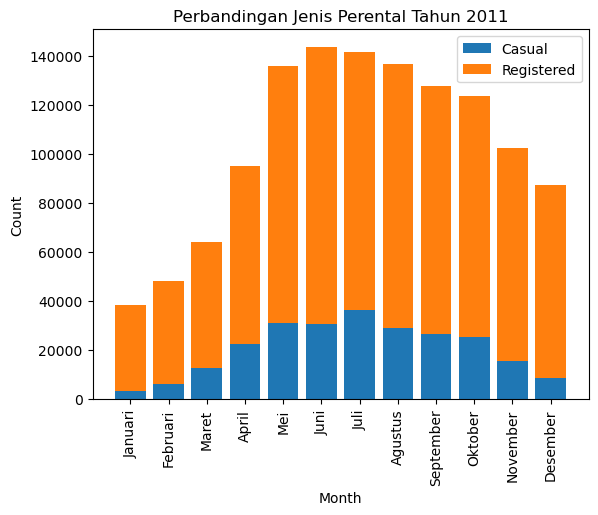

In [73]:
plt.bar(month_rental_2011['mnth'], month_rental_2011['Total Casual'], label='Casual')
plt.bar(month_rental_2011['mnth'], month_rental_2011['Total Registered'], 
        bottom=month_rental_2011['Total Casual'], label='Registered')  
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Perbandingan Jenis Perental Tahun 2011')
plt.xticks(rotation=90)
plt.legend()  
plt.show()

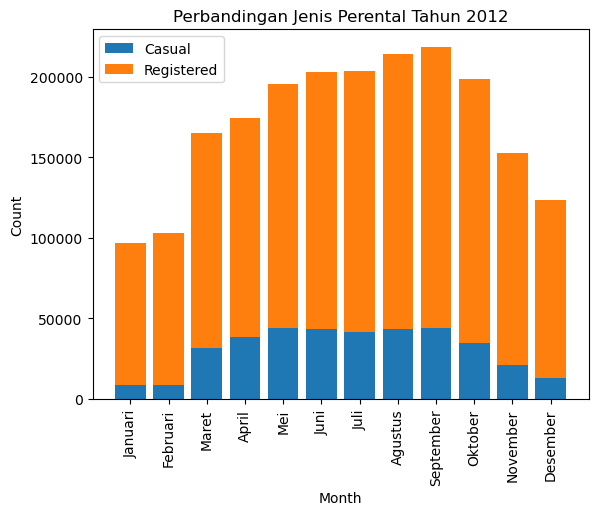

In [75]:
plt.bar(month_rental_2012['mnth'], month_rental_2012['Total Casual'], label='Casual')
plt.bar(month_rental_2012['mnth'], month_rental_2012['Total Registered'], 
        bottom=month_rental_2012['Total Casual'], label='Registered') 
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Perbandingan Jenis Perental Tahun 2012')
plt.xticks(rotation=90)
plt.legend()  
plt.show()

Dan yang terakhir saya akan menampilkan permusim

In [77]:
season_rentaler = data_day.groupby(['season', 'yr']).agg(
    cas_sum=('casual', 'sum'),  
    reg_sum=('registered', 'sum')  
).reset_index()

season_rentaler = season_rentaler.rename(columns={'cas_sum': 'Total Casual', 'reg_sum': 'Total Registered'})
season_rentaler['season'] = season_rentaler['season'].replace(season_mapping)
season_rentaler['Total'] = season_rentaler['Total Casual'] + season_rentaler['Total Registered']
season_rental_2011 = season_rentaler[season_rentaler['yr'] == 0].reset_index(drop=True)
season_rental_2012 = season_rentaler[season_rentaler['yr'] == 1].reset_index(drop=True)
season_rental_2011, season_rental_2012

(   season  yr  Total Casual  Total Registered   Total
 0  Spring   0         21425            128575  150000
 1  Summer   0         77564            269752  347316
 2    Fall   0         95450            324200  419650
 3  Winter   0         52813            273324  326137,
    season  yr  Total Casual  Total Registered   Total
 0  Spring   1         39197            282151  321348
 1  Summer   1        125958            445315  571273
 2    Fall   1        130641            510838  641479
 3  Winter   1         76969            438507  515476)

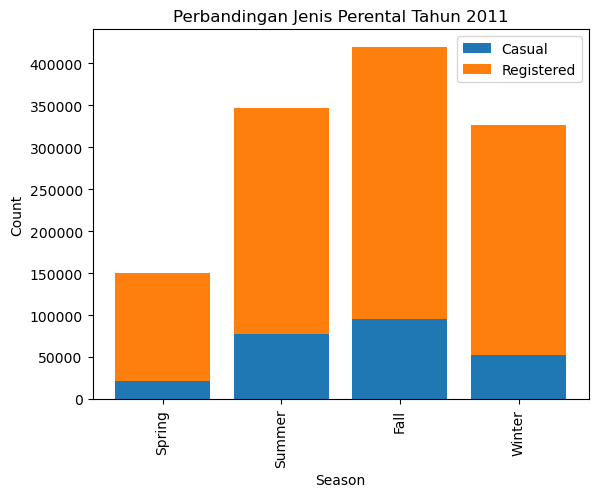

In [80]:
plt.bar(season_rental_2011['season'], season_rental_2011['Total Casual'], label='Casual')
plt.bar(season_rental_2011['season'], season_rental_2011['Total Registered'], 
        bottom=season_rental_2011['Total Casual'], label='Registered')  
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Perbandingan Jenis Perental Tahun 2011')
plt.xticks(rotation=90)
plt.legend()  
plt.show()

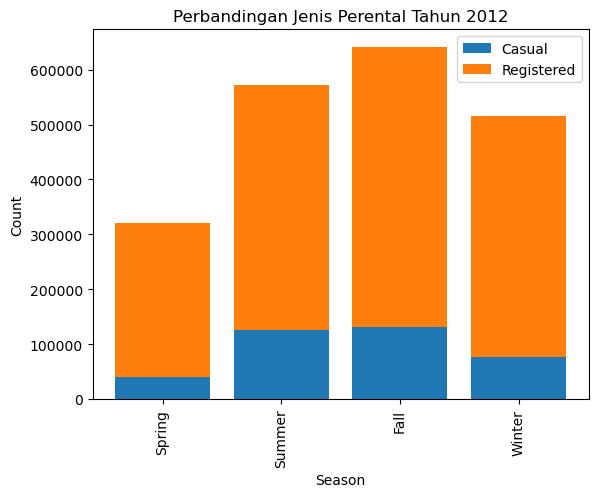

In [82]:
plt.bar(season_rental_2012['season'], season_rental_2012['Total Casual'], label='Casual')
plt.bar(season_rental_2012['season'], season_rental_2012['Total Registered'], 
        bottom=season_rental_2012['Total Casual'], label='Registered')  
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Perbandingan Jenis Perental Tahun 2012')
plt.xticks(rotation=90)
plt.legend()  
plt.show()

Insight : 
- Untuk pertahun (2011 dan 2012) secara keseluruhan, perental naik secara keseluruhan, untuk tipe casual, dari tahun 2011 hingga 2012 cenderung tidak terlalu banyak bertambah daripada perental tipe regisetered. 
- Untuk Perbandingan perbulan (tahun 2011 dan 2012), perental tipe casual cenderung naik di bulan bulain mei hingga september. 
- Untuk perbandingan per musim (2011 dan 2012), secara keseluruhan musim gugur merupakan musim dengan jumlah pengguna paling tinggi dan juga musim dengan perental casual tertinggi pada tahun 2011, sedangkan tahun 2012, pengguna casual cenderung tidak jauh berbeda antara musim panas dengan musim gugur, meskipun secara keseluruhan terdapat perbedaan yang cukup jauh antara total pengguna antara musim gugur dan musim panas. 

## Conclusion

1. Antara weekday atau holiday, peminjaman tertinggi antara 4 musim selama 2 tahun, hari hari kerja/workingday cenderung lebih tinggi dari pada weekend, terutama pada musim panas dan musim gugur. Sedangkan berdasarkan 4 musim, musim gugur merupakan musim dengan total perentalan tertinggi. Penyedia dapat memberikan bonus menyesuaikan musim sebagai promo untuk meningkatkan penyewaan. 

2. Rata rata perental meminjam sepeda tertinggi adalah di pukul 5 sore dalam 1 hari. Namun, berdasarkan grafik, 1 hari terdapat 2 waktu yang cenderung seperti 2 gunung yang menandakan dalam 1 hari ada 2 waktu utama, yaitu pagi dan sore. Satu hari, waktu pagi pada pukul 8 merupakan pukul dengan rata rata peminjaman tertinggi dalam rentang jam 12 malam hingga 12 siang, sedangkan jam 5 sore, merupakan tertinggi dalam 1 hari dan rentang jam 12 siang hingga 12 malam. 

3. Bulan dengan peminjaman sepeda tertinggi jatuh pada bulan agustus. Namun berdasarkan grafi, kenaikan penggunaan rental sepeda cenderung naik secara signifikan pada bulan Mei dan cenderung stabil hingga setidaknya oktober, hingga mengalami penurunan.

4. Untuk perbandingan antara Tipe perental Casual dan registered, terdapat beberapa hasil. Yaitu :
    - Untuk pertahun (2011 dan 2012) secara keseluruhan, perental naik secara keseluruhan, untuk tipe casual, dari tahun 2011 hingga 2012 cenderung tidak terlalu banyak bertambah daripada perental tipe regisetered. 
    - Untuk Perbandingan perbulan (tahun 2011 dan 2012), perental tipe casual cenderung naik di bulan bulain mei hingga september. 
    - Untuk perbandingan per musim (2011 dan 2012), secara keseluruhan musim gugur merupakan musim dengan jumlah pengguna paling tinggi dan juga musim dengan perental casual tertinggi pada tahun 2011, sedangkan tahun 2012, pengguna casual cenderung tidak jauh berbeda antara musim panas dengan musim gugur, meskipun secara keseluruhan terdapat perbedaan yang cukup jauh antara total pengguna antara musim gugur dan musim panas. 
    Dari keadaan perbandingan di atas, pengguna casual dapat di berikan promo agar mau menjadi pengguna registered terutama saat pengguna casual tinggi tingginya. 